# CDC WONDER API Example
[CDC WONDER](https://wonder.cdc.gov/) is a query tool from the Centers for Disease Control (CDC) that provides access to a collection of online databases for the analysis of public health data. 

The following are a sampling of databases available through WONDER that provide vital statistics data through CDC's National Center for Health Statistics

* [Births](https://wonder.cdc.gov/natality.html)
* [Detailed Mortality](https://wonder.cdc.gov/ucd-icd10.html)
* [Compressed Mortality](https://wonder.cdc.gov/mortSQL.html)
* [Multiple cause of death](https://wonder.cdc.gov/mcd.html)
* [Infant Deaths](https://wonder.cdc.gov/lbd.html)

For this example, we will focus on the [Detailed Mortality](https://wonder.cdc.gov/ucd-icd10.html) database, which provides counts or rates (crude or age-adjusted) for underlying cause of death at the national, state and county levels. Using the query tool, the user can select grouping and filtering variables that are use to generate a dataset. Results are provided as a data table which can then be exported to a tab delimited file or visualized.

WONDER provides an API that allows the same queries to be issued through a POST request to WONDER's web server. Requests and responses are issued in XML format and are detailed in the [API Documentation](https://wonder.cdc.gov/wonder/help/WONDER-API.html) page. 

Each XML request consists of a series of parameter tags with name and value children in the following format:

```
<request-parameters>
    <parameter>
        <name></name>
        <value></value>
    <parameter>
    ...
</request-parameters>
```

A reference of parameter names and values can be found on [CDC WONDER Wiki page](https://loyola.campuspack.net/Groups/17FA_CS-703-501/Pet_API#/page/364768481#referenceParameters)

In [66]:

action-Send: Send

O_title: 
O_location: D163.V2
finder-stage-D163.V2: codeset
O_V2_fmode: freg
V_D163.V2: 

finder-stage-D163.V9: codeset
O_V9_fmode: freg
V_D163.V9: 

O_age: D163.V3
V_D163.V3: *All*
V_D163.V8: *All*
V_D163.V4: 1002-5
V_D163.V6: *All*
V_D163.V1: *All*
V_D163.V5: *All*
O_change_action-Send-Export Results: Export Results
O_show_totals: true
O_precision: 0
O_timeout: 600
O_datatable: default


SyntaxError: invalid syntax (<ipython-input-66-d7b450a521bd>, line 3)

In [67]:
# by-variables" or those parameters selected in the "Group Results By" and the "And By" drop-down lists 
# in the "Request Form." These "by-variables" are the cross-tabulations, stratifications or indexes 
# to the query results. Expect the results data table to show a row for each category in the by-variables, 
# and a column for each measure. For example, if you wish to compare data by sex, then "group results by" gender, 
# to get a row for females and a row for males in the output.
# M_ are measures to return, the default measures plus any optional measures.

# For this example, will group by year and race

b_parameters = {
    "B_1": "D163.V3",
    "B_2": "D163.V9-level2",
    "B_3": "*None*",
    "B_4": "*None*",
    "B_5": "*None*"
}

In [68]:
# measures to return, the default measures plus any optional measures

# For this example, include deaths, population, and crude rate

m_parameters = {
    "M_1": "D163.M1"}

In [69]:
# values highlighted in a "Finder" control for hierarchical lists, 
# such as the "Regions/Divisions/States/Counties hierarchical" list.

# For this example, include all years, months, census regions, hhs regions, states. Only include ICD-10 K00-K92
# for disease of the digestive system

f_parameters = {
    "F_D163.V2": "04", 
    "F_D163.V9": ["*All*"],
}

In [70]:
# contents of the "Currently selected" information areas next to "Finder" controls in the "Request Form."

# For this example, include all dates, census regions, hhs regions, and states.
# Only include ICD-10 code K00-K92 for disease of the digestive system

i_parameters = {
    "I_D163.V2": "04 (Arizona)",  # year/month
    "I_D163.V9": "*All* (The United States)" # State County - dont change
}

In [108]:
# variable values to limit in the "where" clause of the query, found in multiple select 
# list boxes and advanced finder text entry boxes in the "Request Form."

# For this example, we want to include ten-year age groups for ages 15-44.
# For all other categories, include all values

v_parameters = {
#    "V_D163.V1": "*ALL*",  
    "V_D163.V2": "",     
#    "V_D163.V3": "*ALL*",     
    "V_D163.V4": "1002-5",     
#    "V_D163.V5": "*ALL*",     
#    "V_D163.V6": "*ALL*",     
#    "V_D163.V8": "*ALL*",    
    "V_D163.V9": "",     
}


In [124]:
# other parameters, such as radio buttons, checkboxes, and lists that are not data categories

# For this example, include age-adjusted rates, use ten-year age groups (D76.V5), use state location by default, 
# show rates per 100,000, use 2013 urbanization and use ICD-10 Codes (D76.V2) for cause of death category

o_parameters = {
    "O_V9_fmode": "freg",  
    "O_V2_fmode": "freg",
# Use regular finder and ignore v parameter value
    "O_age": "D163.V3",        # select age-group (e.g. ten-year, five-year, single-year, infant groups)
    "O_javascript": "on",     # Set to on by default
    "O_location": "D163.V2",   # select location variable to use (e.g. state/county, census, hhs regions)
    "O_precision": "1",       # decimal places
    "O_show_totals": "false",  # Show totals for 
    "O_timeout": "300",
    "O_title": "testrun",    # title for data run
    "O_datatable": "default",    # title for data run
    "O_change_action-Send-Export Results": "Export Results"
}

In [125]:
# Miscellaneous hidden inputs/parameters usually passed by web form. These do not change.
misc_parameters = {
    "action-Send": "Send",
#    "finder-stage-D76.V1": "codeset",
#    "finder-stage-D76.V1": "codeset",
#    "finder-stage-D76.V2": "codeset",
#    "finder-stage-D76.V27": "codeset",
#    "finder-stage-D76.V9": "codeset",
    "stage": "request"
}

In [126]:
def createParameterList(parameterList):
    """Helper function to create a parameter list from a dictionary object"""
    
    parameterString = ""
    
    for key in parameterList:
        parameterString += "<parameter>\n"
        parameterString += "<name>" + key + "</name>\n"
        
        if isinstance(parameterList[key], list):
            for value in parameterList[key]:
                parameterString += "<value>" + value + "</value>\n"
        else:
            parameterString += "<value>" + parameterList[key] + "</value>\n"
        
        parameterString += "</parameter>\n"
        
    return parameterString

In [127]:
xml_request = "<request-parameters>\n"
xml_request += createParameterList(b_parameters)
xml_request += createParameterList(m_parameters)
xml_request += createParameterList(f_parameters)
xml_request += createParameterList(i_parameters)
xml_request += createParameterList(o_parameters)
xml_request += createParameterList(vm_parameters)
xml_request += createParameterList(v_parameters)
#xml_request += createParameterList(misc_parameters)
xml_request += "</request-parameters>"

In [128]:
print(xml_request)

<request-parameters>
<parameter>
<name>B_1</name>
<value>D163.V3</value>
</parameter>
<parameter>
<name>B_2</name>
<value>D163.V9-level2</value>
</parameter>
<parameter>
<name>B_3</name>
<value>*None*</value>
</parameter>
<parameter>
<name>B_4</name>
<value>*None*</value>
</parameter>
<parameter>
<name>B_5</name>
<value>*None*</value>
</parameter>
<parameter>
<name>M_1</name>
<value>D163.M1</value>
</parameter>
<parameter>
<name>F_D163.V2</name>
<value>04</value>
</parameter>
<parameter>
<name>F_D163.V9</name>
<value>*All*</value>
</parameter>
<parameter>
<name>I_D163.V2</name>
<value>04 (Arizona)</value>
</parameter>
<parameter>
<name>I_D163.V9</name>
<value>*All* (The United States)</value>
</parameter>
<parameter>
<name>O_V9_fmode</name>
<value>freg</value>
</parameter>
<parameter>
<name>O_V2_fmode</name>
<value>freg</value>
</parameter>
<parameter>
<name>O_age</name>
<value>D163.V3</value>
</parameter>
<parameter>
<name>O_javascript</name>
<value>on</value>
</parameter>
<parameter>

In [129]:
import requests

url = "https://wonder.cdc.gov/controller/datarequest/D163"
response = requests.post(url, data={"request_xml": xml_request, "accept_datause_restrictions": "true"})

if response.status_code == 200:
    data = response.text
else:
    print("something went wrong")

In [135]:
print(response.text)

<?xml version="1.0"?>
<page>
<platform>prod</platform>
<title>Bridged-Race Population Estimates 1990-2019 Results Form</title>
<dataset code="D163" label="Bridged-Race Population Estimates 1990-2019" family="BridgedRace" validatorFamily="" totals="true" vintage-latest="Bridged Race" agreement-required="false">
	<variable code="D163.V3" label="Age" type="" display-code="F" use-finder="false">
		<other-param-control code="O_age" value="D163.V3"/>
		<value code="0" label="&lt; 1 year"/>
		<value code="1" label="1 year"/>
		<value code="2" label="2 years"/>
		<value code="3" label="3 years"/>
		<value code="4" label="4 years"/>
		<value code="5" label="5 years"/>
		<value code="6" label="6 years"/>
		<value code="7" label="7 years"/>
		<value code="8" label="8 years"/>
		<value code="9" label="9 years"/>
		<value code="10" label="10 years"/>
		<value code="11" label="11 years"/>
		<value code="12" label="12 years"/>
		<value code="13" label="13 years"/>
		<value code="14" label="14 years"/

In [130]:
import lxml.etree as etree

x = etree.parse(response.text)
print(etree.tostring(response.text, pretty_print=True))


OSError: Error reading file '<?xml version="1.0"?>
<page>
<platform>prod</platform>
<title>Bridged-Race Population Estimates 1990-2019 Results Form</title>
<dataset code="D163" label="Bridged-Race Population Estimates 1990-2019" family="BridgedRace" validatorFamily="" totals="true" vintage-latest="Bridged Race" agreement-required="false">
	<variable code="D163.V3" label="Age" type="" display-code="F" use-finder="false">
		<other-param-control code="O_age" value="D163.V3"/>
		<value code="0" label="&lt; 1 year"/>
		<value code="1" label="1 year"/>
		<value code="2" label="2 years"/>
		<value code="3" label="3 years"/>
		<value code="4" label="4 years"/>
		<value code="5" label="5 years"/>
		<value code="6" label="6 years"/>
		<value code="7" label="7 years"/>
		<value code="8" label="8 years"/>
		<value code="9" label="9 years"/>
		<value code="10" label="10 years"/>
		<value code="11" label="11 years"/>
		<value code="12" label="12 years"/>
		<value code="13" label="13 years"/>
		<value code="14" label="14 years"/>
		<value code="15" label="15 years"/>
		<value code="16" label="16 years"/>
		<value code="17" label="17 years"/>
		<value code="18" label="18 years"/>
		<value code="19" label="19 years"/>
		<value code="20" label="20 years"/>
		<value code="21" label="21 years"/>
		<value code="22" label="22 years"/>
		<value code="23" label="23 years"/>
		<value code="24" label="24 years"/>
		<value code="25" label="25 years"/>
		<value code="26" label="26 years"/>
		<value code="27" label="27 years"/>
		<value code="28" label="28 years"/>
		<value code="29" label="29 years"/>
		<value code="30" label="30 years"/>
		<value code="31" label="31 years"/>
		<value code="32" label="32 years"/>
		<value code="33" label="33 years"/>
		<value code="34" label="34 years"/>
		<value code="35" label="35 years"/>
		<value code="36" label="36 years"/>
		<value code="37" label="37 years"/>
		<value code="38" label="38 years"/>
		<value code="39" label="39 years"/>
		<value code="40" label="40 years"/>
		<value code="41" label="41 years"/>
		<value code="42" label="42 years"/>
		<value code="43" label="43 years"/>
		<value code="44" label="44 years"/>
		<value code="45" label="45 years"/>
		<value code="46" label="46 years"/>
		<value code="47" label="47 years"/>
		<value code="48" label="48 years"/>
		<value code="49" label="49 years"/>
		<value code="50" label="50 years"/>
		<value code="51" label="51 years"/>
		<value code="52" label="52 years"/>
		<value code="53" label="53 years"/>
		<value code="54" label="54 years"/>
		<value code="55" label="55 years"/>
		<value code="56" label="56 years"/>
		<value code="57" label="57 years"/>
		<value code="58" label="58 years"/>
		<value code="59" label="59 years"/>
		<value code="60" label="60 years"/>
		<value code="61" label="61 years"/>
		<value code="62" label="62 years"/>
		<value code="63" label="63 years"/>
		<value code="64" label="64 years"/>
		<value code="65" label="65 years"/>
		<value code="66" label="66 years"/>
		<value code="67" label="67 years"/>
		<value code="68" label="68 years"/>
		<value code="69" label="69 years"/>
		<value code="70" label="70 years"/>
		<value code="71" label="71 years"/>
		<value code="72" label="72 years"/>
		<value code="73" label="73 years"/>
		<value code="74" label="74 years"/>
		<value code="75" label="75 years"/>
		<value code="76" label="76 years"/>
		<value code="77" label="77 years"/>
		<value code="78" label="78 years"/>
		<value code="79" label="79 years"/>
		<value code="80" label="80 years"/>
		<value code="81" label="81 years"/>
		<value code="82" label="82 years"/>
		<value code="83" label="83 years"/>
		<value code="84" label="84 years"/>
		<value code="85+" label="85+ years"/>
	</variable>
	<variable code="D163.V8" label="Age Group" type="" display-code="F" use-finder="false">
		<other-param-control code="O_age" value="D163.V8"/>
		<value code="1" label="&lt; 1 year"/>
		<value code="1-4" label="1-4 years"/>
		<value code="5-9" label="5-9 years"/>
		<value code="10-14" label="10-14 years"/>
		<value code="15-19" label="15-19 years"/>
		<value code="20-24" label="20-24 years"/>
		<value code="25-29" label="25-29 years"/>
		<value code="30-34" label="30-34 years"/>
		<value code="35-39" label="35-39 years"/>
		<value code="40-44" label="40-44 years"/>
		<value code="45-49" label="45-49 years"/>
		<value code="50-54" label="50-54 years"/>
		<value code="55-59" label="55-59 years"/>
		<value code="60-64" label="60-64 years "/>
		<value code="65-69" label="65-69 years"/>
		<value code="70-74" label="70-74 years"/>
		<value code="75-79" label="75-79 years"/>
		<value code="80-84" label="80-84 years"/>
		<value code="85+" label="85+ years"/>
	</variable>
	<variable code="D163.V9" label="Regions" type="display-label-code,hier1,related,use-finder" display-code="T-Last" use-finder="true">
		<other-param-control code="O_location" value="D163.V9"/>
		<hier-level code="D163.V9-level1" level="1" label="Region" type="geo=region-cens"/>
		<hier-level code="D163.V9-level2" level="2" label="Division" type="geo=division-cens,valuesvary"/>
		<hier-level code="D163.V9-level3" level="3" label="State" type="geo=state,valuesvary,alias=D163.V2-level1"/>
		<hier-level code="D163.V9-level4" level="4" label="County" type="geo=county-2015,valuesvary,alias=D163.V2-level2"/>
	</variable>
	<variable code="D163.V2" label="States" type="display-label-code,hier1,related,use-finder" display-code="T-Last" use-finder="true">
		<other-param-control code="O_location" value="D163.V2"/>
		<hier-level code="D163.V2-level1" level="1" label="State" type="geo=state,mapvar=D163.V9-level3"/>
		<hier-level code="D163.V2-level2" level="2" label="County" type="geo=county-2015,valuesvary,mapvar=D163.V9-level4"/>
	</variable>
	<variable code="D163.V6" label="Ethnicity" type="" display-code="F" use-finder="false">
		<value code="2135-2" label="Hispanic or Latino"/>
		<value code="2186-5" label="Not Hispanic or Latino"/>
	</variable>
	<variable code="D163.V5" label="Gender" type="" display-code="F" use-finder="false">
		<value code="F" label="Female"/>
		<value code="M" label="Male"/>
	</variable>
	<variable code="D163.V4" label="Race" type="" display-code="F" use-finder="false">
		<value code="1002-5" label="American Indian or Alaska Native"/>
		<value code="A-PI" label="Asian or Pacific Islander"/>
		<value code="2054-5" label="Black or African American"/>
		<value code="2106-3" label="White"/>
	</variable>
	<variable code="D163.V1" label="Yearly July 1st Estimates" type="range=1990-2019" display-code="F" use-finder="false">
		<range>
			<min code="1990" label="1990"/>
			<max code="2019" label="2019"/>
		</range>
		<value code="1990" label="1990"/>
		<value code="1991" label="1991"/>
		<value code="1992" label="1992"/>
		<value code="1993" label="1993"/>
		<value code="1994" label="1994"/>
		<value code="1995" label="1995"/>
		<value code="1996" label="1996"/>
		<value code="1997" label="1997"/>
		<value code="1998" label="1998"/>
		<value code="1999" label="1999"/>
		<value code="2000" label="2000"/>
		<value code="2001" label="2001"/>
		<value code="2002" label="2002"/>
		<value code="2003" label="2003"/>
		<value code="2004" label="2004"/>
		<value code="2005" label="2005"/>
		<value code="2006" label="2006"/>
		<value code="2007" label="2007"/>
		<value code="2008" label="2008"/>
		<value code="2009" label="2009"/>
		<value code="2010" label="2010"/>
		<value code="2011" label="2011"/>
		<value code="2012" label="2012"/>
		<value code="2013" label="2013"/>
		<value code="2014" label="2014"/>
		<value code="2015" label="2015"/>
		<value code="2016" label="2016"/>
		<value code="2017" label="2017"/>
		<value code="2018" label="2018"/>
		<value code="2019" label="2019"/>
	</variable>
	<measure code="D163.M1" label="Population" type="count" datatype="int" isdefault="true"/>
<documentation>
	<citation>United States Department of Health and Human Services (US DHHS), 
		Centers for Disease Control and Prevention (CDC), 
		National Center for Health Statistics (NCHS), 
		Bridged-Race Population Estimates, United States July 1st resident population 
		by state, county, age, sex, bridged-race, and Hispanic origin. 
		Compiled from 1990-1999 bridged-race intercensal population estimates (released by NCHS on 7/26/2004); 
		revised bridged-race 2000-2009 intercensal population estimates (released by NCHS on 10/26/2012); 
		and bridged-race Vintage 2019 (2010-2019) postcensal population estimates (released by NCHS on 7/9/2020).
 		Available on CDC WONDER Online Database.</citation>
	<helpfile>/wonder/help/bridged-race.html</helpfile>
	<jumppageURL>/bridged-race-population.html</jumppageURL>
	<jumppageText>Bridged-Race Population Estimates</jumppageText>
	<citationURL>http://wonder.cdc.gov/bridged-race-v2019.html</citationURL>
	<about><p>
			July 1st population estimates for 1990-2019 by Year, State, County, Race (4-categories), 
			Ethnicity, Sex and Age (1-year or 5-year groups). 
			</p><p>
			The National Center for Health Statistics releases bridged-race population estimates of the 
			July 1st resident population of the United States, 
			based on Census 2000 and Census 2010 counts, for use in calculating vital rates. 
			These estimates result from "bridging" the 31 race categories used in Census 2000 and Census 2010, 
			as specified in the 1997 Office of Management and Budget (OMB) standards for the collection 
			of data on race and ethnicity, to the four race categories specified under the 1977 standards 
			(Asian or Pacific Islander, Black or African American, American Indian or Alaska Native, White). 
			Many data systems, such as vital statistics, are continuing to use the 1977 OMB standards during 
			the transition to full implementation of the 1997 OMB standards. 
			</p><p>
			The U.S. Census Bureau annually releases unbridged population estimates for five-year age groups 
			and race at the county level (http://www.census.gov/popest/research/eval-estimates/eval-est2010.html). 
			The Census Bureau does not release bridged-race or unbridged estimates by single year of age 
			at the county level due to concerns about the reliability of these estimates. 
			However, these estimates are provided to the National Center for Health Statistics to 
			meet programmatic needs such as the creation of age groupings that differ from the 
			standard groupings used by the Census Bureau. Users of the single-year-of-age 
			county-level bridged race population estimates should carefully consider the limited 
			reliability of these estimates.
			</p><p>
			County geography changes over time. New counties are created and old counties are 
			deleted or their boundaries are modified. The county codes and names for 
			1990-1999 are based on Census 2000 geography; those for 2000 and later are based on 
			Census 2010 geography.
			</p><p>
			Estimates for 1990-1999 are bridged-race intercensal estimates of the July 1 resident population. 
			Estimates for 2000-2009 are revised bridged-race intercensal estimates of the July 1 resident population. 
			Estimates for 2010-2019 are bridged-race Vintage 2019 postcensal estimates of the July 1 resident population. 
			These estimates were prepared by the Census Bureau in collaboration with NCHS. 
			</p></about>
	<dataurl>http://www.cdc.gov/nchs/nvss/bridged_race.htm/</dataurl>
	<caveat code="D66.C01a">
		<text evaluate="false"><![CDATA['Missing' appears when county data is not available for a certain year. This occurs because 
			geography changes over time.  New counties are created and old counties are deleted or their 
			boundaries are modified..]]></text>
		<rule>wonder:br-missing-flag()</rule>
	</caveat>
	<caveat code="D163.C02">
		<text evaluate="false"><![CDATA[County geography changes over time.  New counties are created and 
			old counties are deleted or their boundaries are modified.
			The county codes and names for years 1990-1999 are based on Census 2000 geography;
			those for year 2000 and later are based on Census 2010 geography.]]></text>
		<rule>wonder:br-county()</rule>
	</caveat>
	<caveat code="D163.C02a">
		<text evaluate="false"><![CDATA[The U.S. Census Bureau annually releases unbridged population 
			estimates for five-year age groups and race at the county level 
			(http://www.census.gov/popest/research/eval-estimates/eval-est2010.html). 
			The Census Bureau does not release bridged-race or unbridged estimates by 
			single year of age at the county level due to concerns about the reliability of 
			these estimates. However, these estimates are provided to the 
			National Center for Health Statistics to meet programmatic needs such as the 
			creation of age groupings that differ from the standard groupings used by the 
			Census Bureau. Users of the single-year-of-age county-level bridged race 
			population estimates should carefully consider the limited reliability 
			of these estimates.]]></text>
		<rule>wonder:br-single-year-age-and-county()</rule>
	</caveat>
	<caveat code="D163.C02b">
		<text evaluate="false"><![CDATA[The query results include the sum of the population for more than one year. To see 
			the population for a single year, either sort by year, or select only one year.]]></text>
		<rule>wonder:br-year()</rule>
	</caveat>
	<caveat xmlns:wonder="http://wonder.cdc.gov" xmlns:xalan="http://xml.apache.org/xalan" code="D163.C02c">
		<text evaluate="true">concat("These items in the results table are not fully selected: ", wonder:partial-hier-labels(), ". The Query Description lists the actual values selected.")</text>
		<rule>wonder:partial-hier()</rule>
	</caveat>
	<caveat code="D163.C15">
		<text evaluate="false"><![CDATA[Hoonah-Angoon Census Area, Alaska (FIPS code 02105) was created from the former 
			Skagway-Hoonah-Angoon Census Area (FIPS code 02232) effective June 20, 2007. 
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Hoonah-Angoon Census Area are available for years 2000 and later.]]></text>
		<rule>wonder:br-ctys('02', '02105')</rule>
	</caveat>
	<caveat code="D163.C12">
		<text evaluate="false"><![CDATA[Ketchikan Gateway Borough, Alaska (FIPS code 02130)
			annexed most of Outer Ketchikan from the former Prince of Wales-Outer Ketchikan Census 
			Area (FIPS code 02201) effective May 19, 2008.
			This change was made retroactive in the data to the year 2000. Therefore Ketchikan Gateway Borough 
			has a discontinuity in the population estimates between 1999 and 2000 due to the addition of population.]]></text>
		<rule>wonder:br-ctys('02', '02130')</rule>
	</caveat>
	<caveat code="D163.C8">
		<text evaluate="false"><![CDATA[About Petersburg Borough/Census Area, Alaska (FIPS code 02195):
 			Petersburg Census Area  was formed on June 1, 2008 from part of the former 
			Wrangell-Petersburg Census Area (FIPS code 02280). 
			Effective January 3, 2013, Petersburg Census Area ceased to exist; 
			Petersburg Borough (same FIPS code 02195) was formed from part of 
			Petersburg Census Area and part of Hoonah-Angoon Census Area (02105). 
			Population estimates for Petersburg Census Area  are shown for years 2000-2009. 
			Population estimates for Petersburg Borough are shown for years after 2010.]]></text>
		<rule>wonder:br-ctys('02', '02195')</rule>
	</caveat>
	<caveat code="D163.C11">
		<text evaluate="false"><![CDATA[Prince of Wales-Hyder Census Area, Alaska (FIPS code 02198) was formed on June 1, 2008 
			from part of the former Prince of Wales-Outer Ketchikan Census Area (FIPS code 02201).
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Prince of Wales-Hyder Census Area are available for years 2000 and later.]]></text>
		<rule>wonder:br-ctys('02', '02198')</rule>
	</caveat>
	<caveat code="D163.C10">
		<text evaluate="false"><![CDATA[Prince of Wales-Outer Ketchikan Census Area, Alaska (FIPS code 02201) ceased to exist 
			effective June 1, 2008. 
			The Outer Ketchikan area was annexed by the Ketchikan Gateway Borough (FIPS code 02130),
			part was included in Wrangell City and Borough (FIPS code 02275), and the remainder was renamed 
			Prince of Wales-Hyder Census Area (FIPS code 02198).  
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Prince of Wales-Outer Ketchikan Census Area are only available for the years 1990-1999.]]></text>
		<rule>wonder:br-ctys('02', '02201')</rule>
	</caveat>
	<caveat code="D163.C14">
		<text evaluate="false"><![CDATA[Skagway Municipality, Alaska (FIPS code 02230) was created from the former 
			Skagway-Hoonah-Angoon Census Area (FIPS code 02232) effective June 20, 2007. 
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Skagway Municipality are available for years 2000 and later.]]></text>
		<rule>wonder:br-ctys('02', '02230')</rule>
	</caveat>
	<caveat code="D163.C13">
		<text evaluate="false"><![CDATA[Skagway-Hoonah-Angoon Census Area, Alaska (FIPS code 02232) ceased to exist 
			effective June 20, 2007. Skagway Municipality (FIPS code 02230) 
			and Hoonah-Angoon Census Area (FIPS code 02105) were created from the former census area. 
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Skagway-Hoonah-Angoon Census Area are only available for the years 1990-1999.]]></text>
		<rule>wonder:br-ctys('02', '02232')</rule>
	</caveat>
	<caveat code="D163.C18">
		<text evaluate="false"><![CDATA[Wade Hampton Census Area, AK (02270) was renamed to Kusilvak Census Area, AK (02158)
			effective July 1, 2015.	This change was made retroactive in the data to the year 1990.]]></text>
		<rule>wonder:br-ctys('02', '02158')</rule>
	</caveat>
	<caveat code="D163.C9">
		<text evaluate="false"><![CDATA[Wrangell City and Borough, Alaska (FIPS code 02275), 
			was formed on June 1, 2008 from part of the former Wrangell-Petersburg Census Area (FIPS code 02280)
			and part of the former Prince of Wales-Outer Ketchikan Census Area (FIPS code 02201).   
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Wrangell City and Borough are available for years 2000 and later.]]></text>
		<rule>wonder:br-ctys('02', '02275')</rule>
	</caveat>
	<caveat code="D163.C7">
		<text evaluate="false"><![CDATA[Wrangell-Petersburg Census Area, Alaska (FIPS code 02280) ceased to exist 
			effective June 1, 2008. Petersburg Census Area (FIPS code 02195) and Wrangell City and Borough (FIPS code 02275) 
			were created from the former census area.  
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Wrangell-Petersburg Census Area are only available for the years 1990-1999.]]></text>
		<rule>wonder:br-ctys('02', '02280')</rule>
	</caveat>
	<caveat code="D163.C5">
		<text evaluate="false"><![CDATA[Broomfield County, Colorado (FIPS code 08014), 
			was formed on November 15, 2001 from parts 
			of Adams County (FIPS code 08001), Boulder County (FIPS code 08013), Jefferson County (FIPS code 08059), 
			and Weld County (FIPS code 08123). 
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Broomfield county are available for the year 2000 and later.  The other counties have a discontinuity in
			the population estimates between 1999 and 2000 due to the loss of population.]]></text>
		<rule>wonder:br-ctys('08', '08001,08013,08014,08059,08123')</rule>
	</caveat>
	<caveat code="D163.C19">
		<text evaluate="false"><![CDATA[Shannon County, SD (46113) was renamed to Oglala Lakota County, SD (46102)
			effective July 1, 2015.	This change was made retroactive in the data to the year 1990.]]></text>
		<rule>wonder:br-ctys('46', '46102')</rule>
	</caveat>
	<caveat code="D163.C17">
		<text evaluate="false"><![CDATA[Bedford City, Virginia (FIPS code 51515), 
			formerly an independent city, merged with Bedford County (FIPS code 51019) on July 1, 2013. 
			This change was made retroactive in the data to the year 2010. Therefore population estimates for 
			Bedford City are only available for the years 1990-2009, and Bedford County
			has a discontinuity in the population estimates between 2009 and 2010 due to the addition of population.]]></text>
		<rule>wonder:br-ctys('51', '51515,51019')</rule>
	</caveat>
	<caveat code="D163.C6">
		<text evaluate="false"><![CDATA[Clifton Forge City, Virginia (FIPS code 51560), 
			formerly an independent city, merged with  Alleghany County (FIPS code 51005) on July 1, 2001. 
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Clifton Forge City are available only for the years prior to 2000.  Alleghany County has a discontinuity in
			the population estimates between 1999 and 2000 due to the addition of population.]]></text>
		<rule>wonder:br-ctys('51', '51005,51560')</rule>
	</caveat>
	<caveat code="D163.C16">
		<text evaluate="false"><![CDATA[South Boston City, Virginia (FIPS code 51780), 
			formerly an independent city, merged with Halifax County (FIPS code 51083) on June 30, 1995. 
			This change was made retroactive in the data to the year 1990. 
			Therefore, population data for South Boston City
			have been reported with Halifax County since year 1990.]]></text>
		<rule>wonder:br-ctys('51', '51083')</rule>
	</caveat>
<footnote>'BR2019.F1'</footnote>
<footnote>wonder:br-fn-broomfield1()</footnote>
<footnote>wonder:br-fn-broomfield2()</footnote>
<footnote>wonder:br-fn-clifton1()</footnote>
<footnote>wonder:br-fn-clifton2()</footnote>
<footnote>wonder:br-fn-Hoonah-Angoon()</footnote>
<footnote>wonder:br-fn-Skagway()</footnote>
<footnote>wonder:br-fn-Skagway-Hoonah-Angoon()</footnote>
<footnote>wonder:br-fn-petersburg-ak()</footnote>
<footnote>wonder:br-fn-wrangell-petersburg-ak()</footnote>
<footnote>wonder:br-fn-wrangell-ak()</footnote>
<footnote>wonder:br-fn-prince-wales-hyder-ak()</footnote>
<footnote>wonder:br-fn-prince-wales-ketchikan-ak()</footnote>
<footnote>wonder:br-fn-ketchikan-gateway-ak()</footnote>
<footnote>wonder:br-fn-bedford-city-va()</footnote>
<footnote>wonder:br-fn-bedford-county-va()</footnote>
</documentation>
<missing var1="D163.V9-level4" var2="D163.V1">
	<alias code="D163.V2" alias="D163.V9"/>
	<alias code="D163.V2-level1" alias="D163.V9-level3"/>
	<alias code="D163.V2-level2" alias="D163.V9-level4"/>
	<instance code="02105">
		<range>1990-1999</range>
	</instance>
	<instance code="02195">
		<range>1990-1999</range>
	</instance>
	<instance code="02198">
		<range>1990-1999</range>
	</instance>
	<instance code="02201">
		<range>2000-2019</range>
	</instance>
	<instance code="02230">
		<range>1990-1999</range>
	</instance>
	<instance code="02232">
		<range>2000-2019</range>
	</instance>
	<instance code="02275">
		<range>1990-1999</range>
	</instance>
	<instance code="02280">
		<range>2000-2019</range>
	</instance>
	<instance code="08014">
		<range>1990-1999</range>
	</instance>
	<instance code="51515">
		<range>2010-2019</range>
	</instance>
	<instance code="51560">
		<range>2000-2019</range>
	</instance>
</missing>
</dataset>
<response>
<request query-date="Jan 9, 2021 10:20:10 PM">
<variable-selections>
	<variable code="D163.V9" from-finder="true">
		<partial var-code="D163.V9-level1" code="CENS-R4" label="Census Region 4: West"/>
		<partial var-code="D163.V9-level2" code="CENS-D8" label="Division 8: Mountain"/>
		<value code="04" label="Arizona"/>
	</variable>
	<variable code="D163.V2" from-finder="true">
		<value code="04" label="Arizona"/>
	</variable>
	<variable code="D163.V4" from-finder="false">
		<value code="1002-5"/>
	</variable>
</variable-selections>
<byvariables>
	<variable code="D163.V3"/>
	<variable code="D163.V9-level2"/>
</byvariables>
<list-variables>
</list-variables>
<measure-selections>
	<measure code="D163.M1"/>
</measure-selections>
<other-parameters>
	<parameter code="O_show_totals" label="Show Totals" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_show_zeros" label="Show Zero Values" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_show_suppressed" label="Show Suppressed" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_precision" label="Precision" display="false">
		<option value="0" label="0"/>
		<option value="1" label="1"/>
		<option value="2" label="2"/>
		<option value="3" label="3"/>
		<option value="4" label="4"/>
		<option value="5" label="5"/>
		<option value="6" label="6"/>
		<option value="7" label="7"/>
		<option value="8" label="8"/>
		<option value="9" label="9"/>
		<value>1</value>
	</parameter>
	<parameter code="O_timeout" label="Data Access Timeout" display="false">
		<option value="60" label="1"/>
		<option value="120" label="2"/>
		<option value="180" label="3"/>
		<option value="240" label="4"/>
		<option value="300" label="5"/>
		<option value="360" label="6"/>
		<option value="420" label="7"/>
		<option value="480" label="8"/>
		<option value="540" label="9"/>
		<option value="600" label="10"/>
		<option value="660" label="11"/>
		<option value="720" label="12"/>
		<option value="780" label="13"/>
		<option value="840" label="14"/>
		<option value="900" label="15"/>
		<value>300</value>
	</parameter>
	<parameter code="O_groups_count" label="Groups" display="false">
		<option value="2" label="Two"/>
		<option value="3" label="Three"/>
		<option value="4" label="Four"/>
		<option value="5" label="Five"/>
		<option value="6" label="Six"/>
		<option value="7" label="Seven"/>
		<option value="8" label="Eight"/>
		<option value="9" label="Nine"/>
		<option value="10" label="Ten"/>
		<value>4</value>
	</parameter>
	<parameter code="O_groups_methods" label="Group Breaks Method" display="false">
		<option value="QUANTILE" label="Quantile"/>
		<option value="EQUAL" label="Equal Interval"/>
		<value>QUANTILE</value>
	</parameter>
	<parameter code="O_datatable" label="Data Table" display="true">
		<option value="default" label="Default"/>
		<option value="state" label="State Level"/>
		<option value="county" label="County Level"/>
		<value>default</value>
	</parameter>
	<parameter code="O_title" display="false">
		<value>testrun</value>
	</parameter>
	<parameter code="O_change_action-Send-Export Results" display="false">
		<value>Export Results</value>
	</parameter>
	<parameter code="O_V9_fmode" display="false">
		<value>freg</value>
	</parameter>
	<parameter code="O_javascript" display="false">
		<value>on</value>
	</parameter>
	<parameter code="O_age" display="false">
		<value>D163.V3</value>
	</parameter>
	<parameter code="O_location" display="false">
		<value>D163.V2</value>
	</parameter>
	<parameter code="O_V2_fmode" display="false">
		<value>freg</value>
	</parameter>
	<parameter code="O_labels_opt" display="false">
		<value>false</value>
	</parameter>
	<parameter code="O_show_rank" display="false">
		<value>false</value>
	</parameter>
	<parameter code="O_groups" display="false">
		<value>false</value>
	</parameter>
</other-parameters>
<request-parameters>
	<parameter>
		<name>B_1</name>
		<value>D163.V3</value>
	</parameter>
	<parameter>
		<name>B_2</name>
		<value>D163.V9-level2</value>
	</parameter>
	<parameter>
		<name>B_3</name>
		<value>*None*</value>
	</parameter>
	<parameter>
		<name>B_4</name>
		<value>*None*</value>
	</parameter>
	<parameter>
		<name>B_5</name>
		<value>*None*</value>
	</parameter>
	<parameter>
		<name>M_1</name>
		<value>D163.M1</value>
	</parameter>
	<parameter>
		<name>VM_D76.M6_D76.V10</name>
		<value></value>
	</parameter>
	<parameter>
		<name>VM_D76.M6_D76.V17</name>
		<value>*All*</value>
	</parameter>
	<parameter>
		<name>VM_D76.M6_D76.V1_S</name>
		<value>*All*</value>
	</parameter>
	<parameter>
		<name>VM_D76.M6_D76.V7</name>
		<value>*All*</value>
	</parameter>
	<parameter>
		<name>VM_D76.M6_D76.V8</name>
		<value>*All*</value>
	</parameter>
	<parameter>
		<name>V_D163.V2</name>
		<value></value>
	</parameter>
	<parameter>
		<name>V_D163.V4</name>
		<value>1002-5</value>
	</parameter>
	<parameter>
		<name>V_D163.V9</name>
		<value></value>
	</parameter>
</request-parameters>
</request>
<other-parameters>
	<parameter code="O_show_totals" label="Show Totals" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_show_zeros" label="Show Zero Values" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_show_suppressed" label="Show Suppressed" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_precision" label="Precision" display="false">
		<option value="0" label="0"/>
		<option value="1" label="1"/>
		<option value="2" label="2"/>
		<option value="3" label="3"/>
		<option value="4" label="4"/>
		<option value="5" label="5"/>
		<option value="6" label="6"/>
		<option value="7" label="7"/>
		<option value="8" label="8"/>
		<option value="9" label="9"/>
		<value>1</value>
	</parameter>
	<parameter code="O_timeout" label="Data Access Timeout" display="false">
		<option value="60" label="1"/>
		<option value="120" label="2"/>
		<option value="180" label="3"/>
		<option value="240" label="4"/>
		<option value="300" label="5"/>
		<option value="360" label="6"/>
		<option value="420" label="7"/>
		<option value="480" label="8"/>
		<option value="540" label="9"/>
		<option value="600" label="10"/>
		<option value="660" label="11"/>
		<option value="720" label="12"/>
		<option value="780" label="13"/>
		<option value="840" label="14"/>
		<option value="900" label="15"/>
		<value>300</value>
	</parameter>
	<parameter code="O_groups_count" label="Groups" display="false">
		<option value="2" label="Two"/>
		<option value="3" label="Three"/>
		<option value="4" label="Four"/>
		<option value="5" label="Five"/>
		<option value="6" label="Six"/>
		<option value="7" label="Seven"/>
		<option value="8" label="Eight"/>
		<option value="9" label="Nine"/>
		<option value="10" label="Ten"/>
		<value>4</value>
	</parameter>
	<parameter code="O_groups_methods" label="Group Breaks Method" display="false">
		<option value="QUANTILE" label="Quantile"/>
		<option value="EQUAL" label="Equal Interval"/>
		<value>QUANTILE</value>
	</parameter>
	<parameter code="O_datatable" label="Data Table" display="true">
		<option value="default" label="Default"/>
		<option value="state" label="State Level"/>
		<option value="county" label="County Level"/>
		<value>default</value>
	</parameter>
	<parameter code="O_title" display="false">
		<value>testrun</value>
	</parameter>
	<parameter code="O_change_action-Send-Export Results" display="false">
		<value>Export Results</value>
	</parameter>
	<parameter code="O_V9_fmode" display="false">
		<value>freg</value>
	</parameter>
	<parameter code="O_javascript" display="false">
		<value>on</value>
	</parameter>
	<parameter code="O_age" display="false">
		<value>D163.V3</value>
	</parameter>
	<parameter code="O_location" display="false">
		<value>D163.V2</value>
	</parameter>
	<parameter code="O_V2_fmode" display="false">
		<value>freg</value>
	</parameter>
	<parameter code="O_labels_opt" display="false">
		<value>false</value>
	</parameter>
	<parameter code="O_show_rank" display="false">
		<value>false</value>
	</parameter>
	<parameter code="O_groups" display="false">
		<value>false</value>
	</parameter>
	<parameter code="O_labels_quick" display="false">
		<value>false</value>
	</parameter>
</other-parameters>
<measure-selections>
	<measure code="D163.M1" min="9,745" max="9,483,151" minNtNz="9,745" maxNtNz="203,383" minNtWz="9,745" maxNtWz="203,383" minWtNz="9,745" maxWtNz="9,483,151"/>
</measure-selections>
<measure-selections-all>
	<measure code="D163.M1"/>
</measure-selections-all>
<data-table show-all-labels="false">
<r><c l="&lt; 1 year"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="203,383"/></r>
<r><c l="1 year"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="201,581"/></r>
<r><c l="2 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="196,241"/></r>
<r><c l="3 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="196,500"/></r>
<r><c l="4 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="194,343"/></r>
<r><c l="5 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="192,846"/></r>
<r><c l="6 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="187,760"/></r>
<r><c l="7 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="189,358"/></r>
<r><c l="8 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="188,979"/></r>
<r><c l="9 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="187,822"/></r>
<r><c l="10 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="192,511"/></r>
<r><c l="11 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="189,928"/></r>
<r><c l="12 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="190,988"/></r>
<r><c l="13 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="190,766"/></r>
<r><c l="14 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="187,818"/></r>
<r><c l="15 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="186,112"/></r>
<r><c l="16 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="185,038"/></r>
<r><c l="17 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="182,684"/></r>
<r><c l="18 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="178,180"/></r>
<r><c l="19 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="174,121"/></r>
<r><c l="20 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="171,046"/></r>
<r><c l="21 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="168,126"/></r>
<r><c l="22 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="166,192"/></r>
<r><c l="23 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="165,103"/></r>
<r><c l="24 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="159,954"/></r>
<r><c l="25 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="156,719"/></r>
<r><c l="26 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="154,495"/></r>
<r><c l="27 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="153,719"/></r>
<r><c l="28 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="148,188"/></r>
<r><c l="29 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="147,115"/></r>
<r><c l="30 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="145,224"/></r>
<r><c l="31 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="140,402"/></r>
<r><c l="32 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="139,285"/></r>
<r><c l="33 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="136,267"/></r>
<r><c l="34 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="135,049"/></r>
<r><c l="35 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="132,766"/></r>
<r><c l="36 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="130,446"/></r>
<r><c l="37 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="127,003"/></r>
<r><c l="38 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="123,574"/></r>
<r><c l="39 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="123,934"/></r>
<r><c l="40 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="121,346"/></r>
<r><c l="41 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="117,866"/></r>
<r><c l="42 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="115,080"/></r>
<r><c l="43 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="112,350"/></r>
<r><c l="44 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="108,046"/></r>
<r><c l="45 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="107,940"/></r>
<r><c l="46 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="104,367"/></r>
<r><c l="47 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="101,885"/></r>
<r><c l="48 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="97,314"/></r>
<r><c l="49 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="97,561"/></r>
<r><c l="50 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="95,331"/></r>
<r><c l="51 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="92,132"/></r>
<r><c l="52 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="88,704"/></r>
<r><c l="53 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="85,476"/></r>
<r><c l="54 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="83,983"/></r>
<r><c l="55 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="80,037"/></r>
<r><c l="56 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="76,137"/></r>
<r><c l="57 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="71,981"/></r>
<r><c l="58 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="67,752"/></r>
<r><c l="59 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="66,686"/></r>
<r><c l="60 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="62,469"/></r>
<r><c l="61 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="59,630"/></r>
<r><c l="62 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="56,444"/></r>
<r><c l="63 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="54,158"/></r>
<r><c l="64 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="50,619"/></r>
<r><c l="65 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="48,325"/></r>
<r><c l="66 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="45,069"/></r>
<r><c l="67 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="42,793"/></r>
<r><c l="68 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="40,441"/></r>
<r><c l="69 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="37,516"/></r>
<r><c l="70 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="35,687"/></r>
<r><c l="71 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="32,315"/></r>
<r><c l="72 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="30,459"/></r>
<r><c l="73 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="28,407"/></r>
<r><c l="74 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="26,049"/></r>
<r><c l="75 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="24,189"/></r>
<r><c l="76 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="22,446"/></r>
<r><c l="77 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="20,327"/></r>
<r><c l="78 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="18,698"/></r>
<r><c l="79 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="17,704"/></r>
<r><c l="80 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="15,629"/></r>
<r><c l="81 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="13,853"/></r>
<r><c l="82 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="12,794"/></r>
<r><c l="83 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="11,178"/></r>
<r><c l="84 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="9,745"/></r>
<r><c l="85+ years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="52,667"/></r>
</data-table>
<options>
<other-parameters>
	<parameter code="O_show_totals" label="Show Totals" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_show_zeros" label="Show Zero Values" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_show_suppressed" label="Show Suppressed" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_precision" label="Precision" display="false">
		<option value="0" label="0"/>
		<option value="1" label="1"/>
		<option value="2" label="2"/>
		<option value="3" label="3"/>
		<option value="4" label="4"/>
		<option value="5" label="5"/>
		<option value="6" label="6"/>
		<option value="7" label="7"/>
		<option value="8" label="8"/>
		<option value="9" label="9"/>
		<value>1</value>
	</parameter>
	<parameter code="O_timeout" label="Data Access Timeout" display="false">
		<option value="60" label="1"/>
		<option value="120" label="2"/>
		<option value="180" label="3"/>
		<option value="240" label="4"/>
		<option value="300" label="5"/>
		<option value="360" label="6"/>
		<option value="420" label="7"/>
		<option value="480" label="8"/>
		<option value="540" label="9"/>
		<option value="600" label="10"/>
		<option value="660" label="11"/>
		<option value="720" label="12"/>
		<option value="780" label="13"/>
		<option value="840" label="14"/>
		<option value="900" label="15"/>
		<value>300</value>
	</parameter>
	<parameter code="O_groups_count" label="Groups" display="false">
		<option value="2" label="Two"/>
		<option value="3" label="Three"/>
		<option value="4" label="Four"/>
		<option value="5" label="Five"/>
		<option value="6" label="Six"/>
		<option value="7" label="Seven"/>
		<option value="8" label="Eight"/>
		<option value="9" label="Nine"/>
		<option value="10" label="Ten"/>
		<value>4</value>
	</parameter>
	<parameter code="O_groups_methods" label="Group Breaks Method" display="false">
		<option value="QUANTILE" label="Quantile"/>
		<option value="EQUAL" label="Equal Interval"/>
		<value>QUANTILE</value>
	</parameter>
	<parameter code="O_datatable" label="Data Table" display="true">
		<option value="default" label="Default"/>
		<option value="state" label="State Level"/>
		<option value="county" label="County Level"/>
		<value>default</value>
	</parameter>
	<parameter code="O_title" display="false">
		<value>testrun</value>
	</parameter>
	<parameter code="O_change_action-Send-Export Results" display="false">
		<value>Export Results</value>
	</parameter>
	<parameter code="O_V9_fmode" display="false">
		<value>freg</value>
	</parameter>
	<parameter code="O_javascript" display="false">
		<value>on</value>
	</parameter>
	<parameter code="O_age" display="false">
		<value>D163.V3</value>
	</parameter>
	<parameter code="O_location" display="false">
		<value>D163.V2</value>
	</parameter>
	<parameter code="O_V2_fmode" display="false">
		<value>freg</value>
	</parameter>
	<parameter code="O_labels_opt" display="false">
		<value>false</value>
	</parameter>
	<parameter code="O_show_rank" display="false">
		<value>false</value>
	</parameter>
	<parameter code="O_groups" display="false">
		<value>false</value>
	</parameter>
	<parameter code="O_labels_quick" display="false">
		<value>false</value>
	</parameter>
</other-parameters>
<measure-selections-show>
	<measure code="D163.M1"/>
</measure-selections-show>
<groups>
</groups>
</options>
<footnotes>
<footnote>
<symbol>Note:</symbol>
<text>Estimates for 1990-1999 are bridged-race intercensal
    population estimates of the July 1 resident population.
    Estimates for 2000-2009 are revised bridged-race intercensal
    estimates of the July 1 resident population. Estimates for
    2010-2019 are bridged-race Vintage 2019 postcensal estimates of
    the July 1 resident population. These estimates were prepared
    by the Census Bureau in collaboration with NCHS.</text>
</footnote>
</footnotes>
<caveats>
<caveat><![CDATA[The query results include the sum of the population for more than one year. To see 
			the population for a single year, either sort by year, or select only one year.]]></caveat>
<caveat><![CDATA[These items in the results table are not fully selected: Division 8: Mountain. The Query Description lists the actual values selected.]]></caveat>
</caveats>
</response>
<tabs2>
	<tab label="Request Form" status="closed" target="request" title="Click to see the request page"/>
	<tab label="Results" status="open" target="results" title="Click to see the results table"/>
	<tab label="Map" status="closed" target="map" title="Click to create maps"/>
	<tab label="Chart" status="closed" target="chart" title="Click to create charts"/>
	<tab label="About" status="closed" target="about" title="Information about this dataset"/>
</tabs2>
<thisfile>\wonder\templates\xsl\table_response.xsl</thisfile>
</page>': failed to load external entity "<?xml version="1.0"?>
<page>
<platform>prod</platform>
<title>Bridged-Race Population Estimates 1990-2019 Results Form</title>
<dataset code="D163" label="Bridged-Race Population Estimates 1990-2019" family="BridgedRace" validatorFamily="" totals="true" vintage-latest="Bridged Race" agreement-required="false">
	<variable code="D163.V3" label="Age" type="" display-code="F" use-finder="false">
		<other-param-control code="O_age" value="D163.V3"/>
		<value code="0" label="&lt; 1 year"/>
		<value code="1" label="1 year"/>
		<value code="2" label="2 years"/>
		<value code="3" label="3 years"/>
		<value code="4" label="4 years"/>
		<value code="5" label="5 years"/>
		<value code="6" label="6 years"/>
		<value code="7" label="7 years"/>
		<value code="8" label="8 years"/>
		<value code="9" label="9 years"/>
		<value code="10" label="10 years"/>
		<value code="11" label="11 years"/>
		<value code="12" label="12 years"/>
		<value code="13" label="13 years"/>
		<value code="14" label="14 years"/>
		<value code="15" label="15 years"/>
		<value code="16" label="16 years"/>
		<value code="17" label="17 years"/>
		<value code="18" label="18 years"/>
		<value code="19" label="19 years"/>
		<value code="20" label="20 years"/>
		<value code="21" label="21 years"/>
		<value code="22" label="22 years"/>
		<value code="23" label="23 years"/>
		<value code="24" label="24 years"/>
		<value code="25" label="25 years"/>
		<value code="26" label="26 years"/>
		<value code="27" label="27 years"/>
		<value code="28" label="28 years"/>
		<value code="29" label="29 years"/>
		<value code="30" label="30 years"/>
		<value code="31" label="31 years"/>
		<value code="32" label="32 years"/>
		<value code="33" label="33 years"/>
		<value code="34" label="34 years"/>
		<value code="35" label="35 years"/>
		<value code="36" label="36 years"/>
		<value code="37" label="37 years"/>
		<value code="38" label="38 years"/>
		<value code="39" label="39 years"/>
		<value code="40" label="40 years"/>
		<value code="41" label="41 years"/>
		<value code="42" label="42 years"/>
		<value code="43" label="43 years"/>
		<value code="44" label="44 years"/>
		<value code="45" label="45 years"/>
		<value code="46" label="46 years"/>
		<value code="47" label="47 years"/>
		<value code="48" label="48 years"/>
		<value code="49" label="49 years"/>
		<value code="50" label="50 years"/>
		<value code="51" label="51 years"/>
		<value code="52" label="52 years"/>
		<value code="53" label="53 years"/>
		<value code="54" label="54 years"/>
		<value code="55" label="55 years"/>
		<value code="56" label="56 years"/>
		<value code="57" label="57 years"/>
		<value code="58" label="58 years"/>
		<value code="59" label="59 years"/>
		<value code="60" label="60 years"/>
		<value code="61" label="61 years"/>
		<value code="62" label="62 years"/>
		<value code="63" label="63 years"/>
		<value code="64" label="64 years"/>
		<value code="65" label="65 years"/>
		<value code="66" label="66 years"/>
		<value code="67" label="67 years"/>
		<value code="68" label="68 years"/>
		<value code="69" label="69 years"/>
		<value code="70" label="70 years"/>
		<value code="71" label="71 years"/>
		<value code="72" label="72 years"/>
		<value code="73" label="73 years"/>
		<value code="74" label="74 years"/>
		<value code="75" label="75 years"/>
		<value code="76" label="76 years"/>
		<value code="77" label="77 years"/>
		<value code="78" label="78 years"/>
		<value code="79" label="79 years"/>
		<value code="80" label="80 years"/>
		<value code="81" label="81 years"/>
		<value code="82" label="82 years"/>
		<value code="83" label="83 years"/>
		<value code="84" label="84 years"/>
		<value code="85+" label="85+ years"/>
	</variable>
	<variable code="D163.V8" label="Age Group" type="" display-code="F" use-finder="false">
		<other-param-control code="O_age" value="D163.V8"/>
		<value code="1" label="&lt; 1 year"/>
		<value code="1-4" label="1-4 years"/>
		<value code="5-9" label="5-9 years"/>
		<value code="10-14" label="10-14 years"/>
		<value code="15-19" label="15-19 years"/>
		<value code="20-24" label="20-24 years"/>
		<value code="25-29" label="25-29 years"/>
		<value code="30-34" label="30-34 years"/>
		<value code="35-39" label="35-39 years"/>
		<value code="40-44" label="40-44 years"/>
		<value code="45-49" label="45-49 years"/>
		<value code="50-54" label="50-54 years"/>
		<value code="55-59" label="55-59 years"/>
		<value code="60-64" label="60-64 years "/>
		<value code="65-69" label="65-69 years"/>
		<value code="70-74" label="70-74 years"/>
		<value code="75-79" label="75-79 years"/>
		<value code="80-84" label="80-84 years"/>
		<value code="85+" label="85+ years"/>
	</variable>
	<variable code="D163.V9" label="Regions" type="display-label-code,hier1,related,use-finder" display-code="T-Last" use-finder="true">
		<other-param-control code="O_location" value="D163.V9"/>
		<hier-level code="D163.V9-level1" level="1" label="Region" type="geo=region-cens"/>
		<hier-level code="D163.V9-level2" level="2" label="Division" type="geo=division-cens,valuesvary"/>
		<hier-level code="D163.V9-level3" level="3" label="State" type="geo=state,valuesvary,alias=D163.V2-level1"/>
		<hier-level code="D163.V9-level4" level="4" label="County" type="geo=county-2015,valuesvary,alias=D163.V2-level2"/>
	</variable>
	<variable code="D163.V2" label="States" type="display-label-code,hier1,related,use-finder" display-code="T-Last" use-finder="true">
		<other-param-control code="O_location" value="D163.V2"/>
		<hier-level code="D163.V2-level1" level="1" label="State" type="geo=state,mapvar=D163.V9-level3"/>
		<hier-level code="D163.V2-level2" level="2" label="County" type="geo=county-2015,valuesvary,mapvar=D163.V9-level4"/>
	</variable>
	<variable code="D163.V6" label="Ethnicity" type="" display-code="F" use-finder="false">
		<value code="2135-2" label="Hispanic or Latino"/>
		<value code="2186-5" label="Not Hispanic or Latino"/>
	</variable>
	<variable code="D163.V5" label="Gender" type="" display-code="F" use-finder="false">
		<value code="F" label="Female"/>
		<value code="M" label="Male"/>
	</variable>
	<variable code="D163.V4" label="Race" type="" display-code="F" use-finder="false">
		<value code="1002-5" label="American Indian or Alaska Native"/>
		<value code="A-PI" label="Asian or Pacific Islander"/>
		<value code="2054-5" label="Black or African American"/>
		<value code="2106-3" label="White"/>
	</variable>
	<variable code="D163.V1" label="Yearly July 1st Estimates" type="range=1990-2019" display-code="F" use-finder="false">
		<range>
			<min code="1990" label="1990"/>
			<max code="2019" label="2019"/>
		</range>
		<value code="1990" label="1990"/>
		<value code="1991" label="1991"/>
		<value code="1992" label="1992"/>
		<value code="1993" label="1993"/>
		<value code="1994" label="1994"/>
		<value code="1995" label="1995"/>
		<value code="1996" label="1996"/>
		<value code="1997" label="1997"/>
		<value code="1998" label="1998"/>
		<value code="1999" label="1999"/>
		<value code="2000" label="2000"/>
		<value code="2001" label="2001"/>
		<value code="2002" label="2002"/>
		<value code="2003" label="2003"/>
		<value code="2004" label="2004"/>
		<value code="2005" label="2005"/>
		<value code="2006" label="2006"/>
		<value code="2007" label="2007"/>
		<value code="2008" label="2008"/>
		<value code="2009" label="2009"/>
		<value code="2010" label="2010"/>
		<value code="2011" label="2011"/>
		<value code="2012" label="2012"/>
		<value code="2013" label="2013"/>
		<value code="2014" label="2014"/>
		<value code="2015" label="2015"/>
		<value code="2016" label="2016"/>
		<value code="2017" label="2017"/>
		<value code="2018" label="2018"/>
		<value code="2019" label="2019"/>
	</variable>
	<measure code="D163.M1" label="Population" type="count" datatype="int" isdefault="true"/>
<documentation>
	<citation>United States Department of Health and Human Services (US DHHS), 
		Centers for Disease Control and Prevention (CDC), 
		National Center for Health Statistics (NCHS), 
		Bridged-Race Population Estimates, United States July 1st resident population 
		by state, county, age, sex, bridged-race, and Hispanic origin. 
		Compiled from 1990-1999 bridged-race intercensal population estimates (released by NCHS on 7/26/2004); 
		revised bridged-race 2000-2009 intercensal population estimates (released by NCHS on 10/26/2012); 
		and bridged-race Vintage 2019 (2010-2019) postcensal population estimates (released by NCHS on 7/9/2020).
 		Available on CDC WONDER Online Database.</citation>
	<helpfile>/wonder/help/bridged-race.html</helpfile>
	<jumppageURL>/bridged-race-population.html</jumppageURL>
	<jumppageText>Bridged-Race Population Estimates</jumppageText>
	<citationURL>http://wonder.cdc.gov/bridged-race-v2019.html</citationURL>
	<about><p>
			July 1st population estimates for 1990-2019 by Year, State, County, Race (4-categories), 
			Ethnicity, Sex and Age (1-year or 5-year groups). 
			</p><p>
			The National Center for Health Statistics releases bridged-race population estimates of the 
			July 1st resident population of the United States, 
			based on Census 2000 and Census 2010 counts, for use in calculating vital rates. 
			These estimates result from "bridging" the 31 race categories used in Census 2000 and Census 2010, 
			as specified in the 1997 Office of Management and Budget (OMB) standards for the collection 
			of data on race and ethnicity, to the four race categories specified under the 1977 standards 
			(Asian or Pacific Islander, Black or African American, American Indian or Alaska Native, White). 
			Many data systems, such as vital statistics, are continuing to use the 1977 OMB standards during 
			the transition to full implementation of the 1997 OMB standards. 
			</p><p>
			The U.S. Census Bureau annually releases unbridged population estimates for five-year age groups 
			and race at the county level (http://www.census.gov/popest/research/eval-estimates/eval-est2010.html). 
			The Census Bureau does not release bridged-race or unbridged estimates by single year of age 
			at the county level due to concerns about the reliability of these estimates. 
			However, these estimates are provided to the National Center for Health Statistics to 
			meet programmatic needs such as the creation of age groupings that differ from the 
			standard groupings used by the Census Bureau. Users of the single-year-of-age 
			county-level bridged race population estimates should carefully consider the limited 
			reliability of these estimates.
			</p><p>
			County geography changes over time. New counties are created and old counties are 
			deleted or their boundaries are modified. The county codes and names for 
			1990-1999 are based on Census 2000 geography; those for 2000 and later are based on 
			Census 2010 geography.
			</p><p>
			Estimates for 1990-1999 are bridged-race intercensal estimates of the July 1 resident population. 
			Estimates for 2000-2009 are revised bridged-race intercensal estimates of the July 1 resident population. 
			Estimates for 2010-2019 are bridged-race Vintage 2019 postcensal estimates of the July 1 resident population. 
			These estimates were prepared by the Census Bureau in collaboration with NCHS. 
			</p></about>
	<dataurl>http://www.cdc.gov/nchs/nvss/bridged_race.htm/</dataurl>
	<caveat code="D66.C01a">
		<text evaluate="false"><![CDATA['Missing' appears when county data is not available for a certain year. This occurs because 
			geography changes over time.  New counties are created and old counties are deleted or their 
			boundaries are modified..]]></text>
		<rule>wonder:br-missing-flag()</rule>
	</caveat>
	<caveat code="D163.C02">
		<text evaluate="false"><![CDATA[County geography changes over time.  New counties are created and 
			old counties are deleted or their boundaries are modified.
			The county codes and names for years 1990-1999 are based on Census 2000 geography;
			those for year 2000 and later are based on Census 2010 geography.]]></text>
		<rule>wonder:br-county()</rule>
	</caveat>
	<caveat code="D163.C02a">
		<text evaluate="false"><![CDATA[The U.S. Census Bureau annually releases unbridged population 
			estimates for five-year age groups and race at the county level 
			(http://www.census.gov/popest/research/eval-estimates/eval-est2010.html). 
			The Census Bureau does not release bridged-race or unbridged estimates by 
			single year of age at the county level due to concerns about the reliability of 
			these estimates. However, these estimates are provided to the 
			National Center for Health Statistics to meet programmatic needs such as the 
			creation of age groupings that differ from the standard groupings used by the 
			Census Bureau. Users of the single-year-of-age county-level bridged race 
			population estimates should carefully consider the limited reliability 
			of these estimates.]]></text>
		<rule>wonder:br-single-year-age-and-county()</rule>
	</caveat>
	<caveat code="D163.C02b">
		<text evaluate="false"><![CDATA[The query results include the sum of the population for more than one year. To see 
			the population for a single year, either sort by year, or select only one year.]]></text>
		<rule>wonder:br-year()</rule>
	</caveat>
	<caveat xmlns:wonder="http://wonder.cdc.gov" xmlns:xalan="http://xml.apache.org/xalan" code="D163.C02c">
		<text evaluate="true">concat("These items in the results table are not fully selected: ", wonder:partial-hier-labels(), ". The Query Description lists the actual values selected.")</text>
		<rule>wonder:partial-hier()</rule>
	</caveat>
	<caveat code="D163.C15">
		<text evaluate="false"><![CDATA[Hoonah-Angoon Census Area, Alaska (FIPS code 02105) was created from the former 
			Skagway-Hoonah-Angoon Census Area (FIPS code 02232) effective June 20, 2007. 
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Hoonah-Angoon Census Area are available for years 2000 and later.]]></text>
		<rule>wonder:br-ctys('02', '02105')</rule>
	</caveat>
	<caveat code="D163.C12">
		<text evaluate="false"><![CDATA[Ketchikan Gateway Borough, Alaska (FIPS code 02130)
			annexed most of Outer Ketchikan from the former Prince of Wales-Outer Ketchikan Census 
			Area (FIPS code 02201) effective May 19, 2008.
			This change was made retroactive in the data to the year 2000. Therefore Ketchikan Gateway Borough 
			has a discontinuity in the population estimates between 1999 and 2000 due to the addition of population.]]></text>
		<rule>wonder:br-ctys('02', '02130')</rule>
	</caveat>
	<caveat code="D163.C8">
		<text evaluate="false"><![CDATA[About Petersburg Borough/Census Area, Alaska (FIPS code 02195):
 			Petersburg Census Area  was formed on June 1, 2008 from part of the former 
			Wrangell-Petersburg Census Area (FIPS code 02280). 
			Effective January 3, 2013, Petersburg Census Area ceased to exist; 
			Petersburg Borough (same FIPS code 02195) was formed from part of 
			Petersburg Census Area and part of Hoonah-Angoon Census Area (02105). 
			Population estimates for Petersburg Census Area  are shown for years 2000-2009. 
			Population estimates for Petersburg Borough are shown for years after 2010.]]></text>
		<rule>wonder:br-ctys('02', '02195')</rule>
	</caveat>
	<caveat code="D163.C11">
		<text evaluate="false"><![CDATA[Prince of Wales-Hyder Census Area, Alaska (FIPS code 02198) was formed on June 1, 2008 
			from part of the former Prince of Wales-Outer Ketchikan Census Area (FIPS code 02201).
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Prince of Wales-Hyder Census Area are available for years 2000 and later.]]></text>
		<rule>wonder:br-ctys('02', '02198')</rule>
	</caveat>
	<caveat code="D163.C10">
		<text evaluate="false"><![CDATA[Prince of Wales-Outer Ketchikan Census Area, Alaska (FIPS code 02201) ceased to exist 
			effective June 1, 2008. 
			The Outer Ketchikan area was annexed by the Ketchikan Gateway Borough (FIPS code 02130),
			part was included in Wrangell City and Borough (FIPS code 02275), and the remainder was renamed 
			Prince of Wales-Hyder Census Area (FIPS code 02198).  
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Prince of Wales-Outer Ketchikan Census Area are only available for the years 1990-1999.]]></text>
		<rule>wonder:br-ctys('02', '02201')</rule>
	</caveat>
	<caveat code="D163.C14">
		<text evaluate="false"><![CDATA[Skagway Municipality, Alaska (FIPS code 02230) was created from the former 
			Skagway-Hoonah-Angoon Census Area (FIPS code 02232) effective June 20, 2007. 
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Skagway Municipality are available for years 2000 and later.]]></text>
		<rule>wonder:br-ctys('02', '02230')</rule>
	</caveat>
	<caveat code="D163.C13">
		<text evaluate="false"><![CDATA[Skagway-Hoonah-Angoon Census Area, Alaska (FIPS code 02232) ceased to exist 
			effective June 20, 2007. Skagway Municipality (FIPS code 02230) 
			and Hoonah-Angoon Census Area (FIPS code 02105) were created from the former census area. 
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Skagway-Hoonah-Angoon Census Area are only available for the years 1990-1999.]]></text>
		<rule>wonder:br-ctys('02', '02232')</rule>
	</caveat>
	<caveat code="D163.C18">
		<text evaluate="false"><![CDATA[Wade Hampton Census Area, AK (02270) was renamed to Kusilvak Census Area, AK (02158)
			effective July 1, 2015.	This change was made retroactive in the data to the year 1990.]]></text>
		<rule>wonder:br-ctys('02', '02158')</rule>
	</caveat>
	<caveat code="D163.C9">
		<text evaluate="false"><![CDATA[Wrangell City and Borough, Alaska (FIPS code 02275), 
			was formed on June 1, 2008 from part of the former Wrangell-Petersburg Census Area (FIPS code 02280)
			and part of the former Prince of Wales-Outer Ketchikan Census Area (FIPS code 02201).   
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Wrangell City and Borough are available for years 2000 and later.]]></text>
		<rule>wonder:br-ctys('02', '02275')</rule>
	</caveat>
	<caveat code="D163.C7">
		<text evaluate="false"><![CDATA[Wrangell-Petersburg Census Area, Alaska (FIPS code 02280) ceased to exist 
			effective June 1, 2008. Petersburg Census Area (FIPS code 02195) and Wrangell City and Borough (FIPS code 02275) 
			were created from the former census area.  
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Wrangell-Petersburg Census Area are only available for the years 1990-1999.]]></text>
		<rule>wonder:br-ctys('02', '02280')</rule>
	</caveat>
	<caveat code="D163.C5">
		<text evaluate="false"><![CDATA[Broomfield County, Colorado (FIPS code 08014), 
			was formed on November 15, 2001 from parts 
			of Adams County (FIPS code 08001), Boulder County (FIPS code 08013), Jefferson County (FIPS code 08059), 
			and Weld County (FIPS code 08123). 
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Broomfield county are available for the year 2000 and later.  The other counties have a discontinuity in
			the population estimates between 1999 and 2000 due to the loss of population.]]></text>
		<rule>wonder:br-ctys('08', '08001,08013,08014,08059,08123')</rule>
	</caveat>
	<caveat code="D163.C19">
		<text evaluate="false"><![CDATA[Shannon County, SD (46113) was renamed to Oglala Lakota County, SD (46102)
			effective July 1, 2015.	This change was made retroactive in the data to the year 1990.]]></text>
		<rule>wonder:br-ctys('46', '46102')</rule>
	</caveat>
	<caveat code="D163.C17">
		<text evaluate="false"><![CDATA[Bedford City, Virginia (FIPS code 51515), 
			formerly an independent city, merged with Bedford County (FIPS code 51019) on July 1, 2013. 
			This change was made retroactive in the data to the year 2010. Therefore population estimates for 
			Bedford City are only available for the years 1990-2009, and Bedford County
			has a discontinuity in the population estimates between 2009 and 2010 due to the addition of population.]]></text>
		<rule>wonder:br-ctys('51', '51515,51019')</rule>
	</caveat>
	<caveat code="D163.C6">
		<text evaluate="false"><![CDATA[Clifton Forge City, Virginia (FIPS code 51560), 
			formerly an independent city, merged with  Alleghany County (FIPS code 51005) on July 1, 2001. 
			This change was made retroactive in the data to the year 2000. Therefore population estimates for 
			Clifton Forge City are available only for the years prior to 2000.  Alleghany County has a discontinuity in
			the population estimates between 1999 and 2000 due to the addition of population.]]></text>
		<rule>wonder:br-ctys('51', '51005,51560')</rule>
	</caveat>
	<caveat code="D163.C16">
		<text evaluate="false"><![CDATA[South Boston City, Virginia (FIPS code 51780), 
			formerly an independent city, merged with Halifax County (FIPS code 51083) on June 30, 1995. 
			This change was made retroactive in the data to the year 1990. 
			Therefore, population data for South Boston City
			have been reported with Halifax County since year 1990.]]></text>
		<rule>wonder:br-ctys('51', '51083')</rule>
	</caveat>
<footnote>'BR2019.F1'</footnote>
<footnote>wonder:br-fn-broomfield1()</footnote>
<footnote>wonder:br-fn-broomfield2()</footnote>
<footnote>wonder:br-fn-clifton1()</footnote>
<footnote>wonder:br-fn-clifton2()</footnote>
<footnote>wonder:br-fn-Hoonah-Angoon()</footnote>
<footnote>wonder:br-fn-Skagway()</footnote>
<footnote>wonder:br-fn-Skagway-Hoonah-Angoon()</footnote>
<footnote>wonder:br-fn-petersburg-ak()</footnote>
<footnote>wonder:br-fn-wrangell-petersburg-ak()</footnote>
<footnote>wonder:br-fn-wrangell-ak()</footnote>
<footnote>wonder:br-fn-prince-wales-hyder-ak()</footnote>
<footnote>wonder:br-fn-prince-wales-ketchikan-ak()</footnote>
<footnote>wonder:br-fn-ketchikan-gateway-ak()</footnote>
<footnote>wonder:br-fn-bedford-city-va()</footnote>
<footnote>wonder:br-fn-bedford-county-va()</footnote>
</documentation>
<missing var1="D163.V9-level4" var2="D163.V1">
	<alias code="D163.V2" alias="D163.V9"/>
	<alias code="D163.V2-level1" alias="D163.V9-level3"/>
	<alias code="D163.V2-level2" alias="D163.V9-level4"/>
	<instance code="02105">
		<range>1990-1999</range>
	</instance>
	<instance code="02195">
		<range>1990-1999</range>
	</instance>
	<instance code="02198">
		<range>1990-1999</range>
	</instance>
	<instance code="02201">
		<range>2000-2019</range>
	</instance>
	<instance code="02230">
		<range>1990-1999</range>
	</instance>
	<instance code="02232">
		<range>2000-2019</range>
	</instance>
	<instance code="02275">
		<range>1990-1999</range>
	</instance>
	<instance code="02280">
		<range>2000-2019</range>
	</instance>
	<instance code="08014">
		<range>1990-1999</range>
	</instance>
	<instance code="51515">
		<range>2010-2019</range>
	</instance>
	<instance code="51560">
		<range>2000-2019</range>
	</instance>
</missing>
</dataset>
<response>
<request query-date="Jan 9, 2021 10:20:10 PM">
<variable-selections>
	<variable code="D163.V9" from-finder="true">
		<partial var-code="D163.V9-level1" code="CENS-R4" label="Census Region 4: West"/>
		<partial var-code="D163.V9-level2" code="CENS-D8" label="Division 8: Mountain"/>
		<value code="04" label="Arizona"/>
	</variable>
	<variable code="D163.V2" from-finder="true">
		<value code="04" label="Arizona"/>
	</variable>
	<variable code="D163.V4" from-finder="false">
		<value code="1002-5"/>
	</variable>
</variable-selections>
<byvariables>
	<variable code="D163.V3"/>
	<variable code="D163.V9-level2"/>
</byvariables>
<list-variables>
</list-variables>
<measure-selections>
	<measure code="D163.M1"/>
</measure-selections>
<other-parameters>
	<parameter code="O_show_totals" label="Show Totals" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_show_zeros" label="Show Zero Values" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_show_suppressed" label="Show Suppressed" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_precision" label="Precision" display="false">
		<option value="0" label="0"/>
		<option value="1" label="1"/>
		<option value="2" label="2"/>
		<option value="3" label="3"/>
		<option value="4" label="4"/>
		<option value="5" label="5"/>
		<option value="6" label="6"/>
		<option value="7" label="7"/>
		<option value="8" label="8"/>
		<option value="9" label="9"/>
		<value>1</value>
	</parameter>
	<parameter code="O_timeout" label="Data Access Timeout" display="false">
		<option value="60" label="1"/>
		<option value="120" label="2"/>
		<option value="180" label="3"/>
		<option value="240" label="4"/>
		<option value="300" label="5"/>
		<option value="360" label="6"/>
		<option value="420" label="7"/>
		<option value="480" label="8"/>
		<option value="540" label="9"/>
		<option value="600" label="10"/>
		<option value="660" label="11"/>
		<option value="720" label="12"/>
		<option value="780" label="13"/>
		<option value="840" label="14"/>
		<option value="900" label="15"/>
		<value>300</value>
	</parameter>
	<parameter code="O_groups_count" label="Groups" display="false">
		<option value="2" label="Two"/>
		<option value="3" label="Three"/>
		<option value="4" label="Four"/>
		<option value="5" label="Five"/>
		<option value="6" label="Six"/>
		<option value="7" label="Seven"/>
		<option value="8" label="Eight"/>
		<option value="9" label="Nine"/>
		<option value="10" label="Ten"/>
		<value>4</value>
	</parameter>
	<parameter code="O_groups_methods" label="Group Breaks Method" display="false">
		<option value="QUANTILE" label="Quantile"/>
		<option value="EQUAL" label="Equal Interval"/>
		<value>QUANTILE</value>
	</parameter>
	<parameter code="O_datatable" label="Data Table" display="true">
		<option value="default" label="Default"/>
		<option value="state" label="State Level"/>
		<option value="county" label="County Level"/>
		<value>default</value>
	</parameter>
	<parameter code="O_title" display="false">
		<value>testrun</value>
	</parameter>
	<parameter code="O_change_action-Send-Export Results" display="false">
		<value>Export Results</value>
	</parameter>
	<parameter code="O_V9_fmode" display="false">
		<value>freg</value>
	</parameter>
	<parameter code="O_javascript" display="false">
		<value>on</value>
	</parameter>
	<parameter code="O_age" display="false">
		<value>D163.V3</value>
	</parameter>
	<parameter code="O_location" display="false">
		<value>D163.V2</value>
	</parameter>
	<parameter code="O_V2_fmode" display="false">
		<value>freg</value>
	</parameter>
	<parameter code="O_labels_opt" display="false">
		<value>false</value>
	</parameter>
	<parameter code="O_show_rank" display="false">
		<value>false</value>
	</parameter>
	<parameter code="O_groups" display="false">
		<value>false</value>
	</parameter>
</other-parameters>
<request-parameters>
	<parameter>
		<name>B_1</name>
		<value>D163.V3</value>
	</parameter>
	<parameter>
		<name>B_2</name>
		<value>D163.V9-level2</value>
	</parameter>
	<parameter>
		<name>B_3</name>
		<value>*None*</value>
	</parameter>
	<parameter>
		<name>B_4</name>
		<value>*None*</value>
	</parameter>
	<parameter>
		<name>B_5</name>
		<value>*None*</value>
	</parameter>
	<parameter>
		<name>M_1</name>
		<value>D163.M1</value>
	</parameter>
	<parameter>
		<name>VM_D76.M6_D76.V10</name>
		<value></value>
	</parameter>
	<parameter>
		<name>VM_D76.M6_D76.V17</name>
		<value>*All*</value>
	</parameter>
	<parameter>
		<name>VM_D76.M6_D76.V1_S</name>
		<value>*All*</value>
	</parameter>
	<parameter>
		<name>VM_D76.M6_D76.V7</name>
		<value>*All*</value>
	</parameter>
	<parameter>
		<name>VM_D76.M6_D76.V8</name>
		<value>*All*</value>
	</parameter>
	<parameter>
		<name>V_D163.V2</name>
		<value></value>
	</parameter>
	<parameter>
		<name>V_D163.V4</name>
		<value>1002-5</value>
	</parameter>
	<parameter>
		<name>V_D163.V9</name>
		<value></value>
	</parameter>
</request-parameters>
</request>
<other-parameters>
	<parameter code="O_show_totals" label="Show Totals" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_show_zeros" label="Show Zero Values" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_show_suppressed" label="Show Suppressed" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_precision" label="Precision" display="false">
		<option value="0" label="0"/>
		<option value="1" label="1"/>
		<option value="2" label="2"/>
		<option value="3" label="3"/>
		<option value="4" label="4"/>
		<option value="5" label="5"/>
		<option value="6" label="6"/>
		<option value="7" label="7"/>
		<option value="8" label="8"/>
		<option value="9" label="9"/>
		<value>1</value>
	</parameter>
	<parameter code="O_timeout" label="Data Access Timeout" display="false">
		<option value="60" label="1"/>
		<option value="120" label="2"/>
		<option value="180" label="3"/>
		<option value="240" label="4"/>
		<option value="300" label="5"/>
		<option value="360" label="6"/>
		<option value="420" label="7"/>
		<option value="480" label="8"/>
		<option value="540" label="9"/>
		<option value="600" label="10"/>
		<option value="660" label="11"/>
		<option value="720" label="12"/>
		<option value="780" label="13"/>
		<option value="840" label="14"/>
		<option value="900" label="15"/>
		<value>300</value>
	</parameter>
	<parameter code="O_groups_count" label="Groups" display="false">
		<option value="2" label="Two"/>
		<option value="3" label="Three"/>
		<option value="4" label="Four"/>
		<option value="5" label="Five"/>
		<option value="6" label="Six"/>
		<option value="7" label="Seven"/>
		<option value="8" label="Eight"/>
		<option value="9" label="Nine"/>
		<option value="10" label="Ten"/>
		<value>4</value>
	</parameter>
	<parameter code="O_groups_methods" label="Group Breaks Method" display="false">
		<option value="QUANTILE" label="Quantile"/>
		<option value="EQUAL" label="Equal Interval"/>
		<value>QUANTILE</value>
	</parameter>
	<parameter code="O_datatable" label="Data Table" display="true">
		<option value="default" label="Default"/>
		<option value="state" label="State Level"/>
		<option value="county" label="County Level"/>
		<value>default</value>
	</parameter>
	<parameter code="O_title" display="false">
		<value>testrun</value>
	</parameter>
	<parameter code="O_change_action-Send-Export Results" display="false">
		<value>Export Results</value>
	</parameter>
	<parameter code="O_V9_fmode" display="false">
		<value>freg</value>
	</parameter>
	<parameter code="O_javascript" display="false">
		<value>on</value>
	</parameter>
	<parameter code="O_age" display="false">
		<value>D163.V3</value>
	</parameter>
	<parameter code="O_location" display="false">
		<value>D163.V2</value>
	</parameter>
	<parameter code="O_V2_fmode" display="false">
		<value>freg</value>
	</parameter>
	<parameter code="O_labels_opt" display="false">
		<value>false</value>
	</parameter>
	<parameter code="O_show_rank" display="false">
		<value>false</value>
	</parameter>
	<parameter code="O_groups" display="false">
		<value>false</value>
	</parameter>
	<parameter code="O_labels_quick" display="false">
		<value>false</value>
	</parameter>
</other-parameters>
<measure-selections>
	<measure code="D163.M1" min="9,745" max="9,483,151" minNtNz="9,745" maxNtNz="203,383" minNtWz="9,745" maxNtWz="203,383" minWtNz="9,745" maxWtNz="9,483,151"/>
</measure-selections>
<measure-selections-all>
	<measure code="D163.M1"/>
</measure-selections-all>
<data-table show-all-labels="false">
<r><c l="&lt; 1 year"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="203,383"/></r>
<r><c l="1 year"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="201,581"/></r>
<r><c l="2 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="196,241"/></r>
<r><c l="3 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="196,500"/></r>
<r><c l="4 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="194,343"/></r>
<r><c l="5 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="192,846"/></r>
<r><c l="6 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="187,760"/></r>
<r><c l="7 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="189,358"/></r>
<r><c l="8 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="188,979"/></r>
<r><c l="9 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="187,822"/></r>
<r><c l="10 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="192,511"/></r>
<r><c l="11 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="189,928"/></r>
<r><c l="12 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="190,988"/></r>
<r><c l="13 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="190,766"/></r>
<r><c l="14 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="187,818"/></r>
<r><c l="15 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="186,112"/></r>
<r><c l="16 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="185,038"/></r>
<r><c l="17 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="182,684"/></r>
<r><c l="18 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="178,180"/></r>
<r><c l="19 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="174,121"/></r>
<r><c l="20 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="171,046"/></r>
<r><c l="21 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="168,126"/></r>
<r><c l="22 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="166,192"/></r>
<r><c l="23 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="165,103"/></r>
<r><c l="24 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="159,954"/></r>
<r><c l="25 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="156,719"/></r>
<r><c l="26 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="154,495"/></r>
<r><c l="27 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="153,719"/></r>
<r><c l="28 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="148,188"/></r>
<r><c l="29 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="147,115"/></r>
<r><c l="30 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="145,224"/></r>
<r><c l="31 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="140,402"/></r>
<r><c l="32 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="139,285"/></r>
<r><c l="33 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="136,267"/></r>
<r><c l="34 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="135,049"/></r>
<r><c l="35 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="132,766"/></r>
<r><c l="36 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="130,446"/></r>
<r><c l="37 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="127,003"/></r>
<r><c l="38 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="123,574"/></r>
<r><c l="39 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="123,934"/></r>
<r><c l="40 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="121,346"/></r>
<r><c l="41 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="117,866"/></r>
<r><c l="42 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="115,080"/></r>
<r><c l="43 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="112,350"/></r>
<r><c l="44 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="108,046"/></r>
<r><c l="45 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="107,940"/></r>
<r><c l="46 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="104,367"/></r>
<r><c l="47 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="101,885"/></r>
<r><c l="48 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="97,314"/></r>
<r><c l="49 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="97,561"/></r>
<r><c l="50 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="95,331"/></r>
<r><c l="51 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="92,132"/></r>
<r><c l="52 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="88,704"/></r>
<r><c l="53 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="85,476"/></r>
<r><c l="54 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="83,983"/></r>
<r><c l="55 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="80,037"/></r>
<r><c l="56 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="76,137"/></r>
<r><c l="57 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="71,981"/></r>
<r><c l="58 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="67,752"/></r>
<r><c l="59 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="66,686"/></r>
<r><c l="60 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="62,469"/></r>
<r><c l="61 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="59,630"/></r>
<r><c l="62 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="56,444"/></r>
<r><c l="63 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="54,158"/></r>
<r><c l="64 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="50,619"/></r>
<r><c l="65 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="48,325"/></r>
<r><c l="66 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="45,069"/></r>
<r><c l="67 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="42,793"/></r>
<r><c l="68 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="40,441"/></r>
<r><c l="69 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="37,516"/></r>
<r><c l="70 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="35,687"/></r>
<r><c l="71 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="32,315"/></r>
<r><c l="72 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="30,459"/></r>
<r><c l="73 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="28,407"/></r>
<r><c l="74 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="26,049"/></r>
<r><c l="75 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="24,189"/></r>
<r><c l="76 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="22,446"/></r>
<r><c l="77 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="20,327"/></r>
<r><c l="78 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="18,698"/></r>
<r><c l="79 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="17,704"/></r>
<r><c l="80 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="15,629"/></r>
<r><c l="81 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="13,853"/></r>
<r><c l="82 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="12,794"/></r>
<r><c l="83 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="11,178"/></r>
<r><c l="84 years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="9,745"/></r>
<r><c l="85+ years"/><c l="Division 8: Mountain" cd="CENS-D8" cf="f"/><c v="52,667"/></r>
</data-table>
<options>
<other-parameters>
	<parameter code="O_show_totals" label="Show Totals" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_show_zeros" label="Show Zero Values" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_show_suppressed" label="Show Suppressed" display="true">
		<option value="true" label="True"/>
		<option value="false" label="False"/>
		<option value="disabled" label="Disabled"/>
		<value>false</value>
	</parameter>
	<parameter code="O_precision" label="Precision" display="false">
		<option value="0" label="0"/>
		<option value="1" label="1"/>
		<option value="2" label="2"/>
		<option value="3" label="3"/>
		<option value="4" label="4"/>
		<option value="5" label="5"/>
		<option value="6" label="6"/>
		<option value="7" label="7"/>
		<option value="8" label="8"/>
		<option value="9" label="9"/>
		<value>1</value>
	</parameter>
	<parameter code="O_timeout" label="Data Access Timeout" display="false">
		<option value="60" label="1"/>
		<option value="120" label="2"/>
		<option value="180" label="3"/>
		<option value="240" label="4"/>
		<option value="300" label="5"/>
		<option value="360" label="6"/>
		<option value="420" label="7"/>
		<option value="480" label="8"/>
		<option value="540" label="9"/>
		<option value="600" label="10"/>
		<option value="660" label="11"/>
		<option value="720" label="12"/>
		<option value="780" label="13"/>
		<option value="840" label="14"/>
		<option value="900" label="15"/>
		<value>300</value>
	</parameter>
	<parameter code="O_groups_count" label="Groups" display="false">
		<option value="2" label="Two"/>
		<option value="3" label="Three"/>
		<option value="4" label="Four"/>
		<option value="5" label="Five"/>
		<option value="6" label="Six"/>
		<option value="7" label="Seven"/>
		<option value="8" label="Eight"/>
		<option value="9" label="Nine"/>
		<option value="10" label="Ten"/>
		<value>4</value>
	</parameter>
	<parameter code="O_groups_methods" label="Group Breaks Method" display="false">
		<option value="QUANTILE" label="Quantile"/>
		<option value="EQUAL" label="Equal Interval"/>
		<value>QUANTILE</value>
	</parameter>
	<parameter code="O_datatable" label="Data Table" display="true">
		<option value="default" label="Default"/>
		<option value="state" label="State Level"/>
		<option value="county" label="County Level"/>
		<value>default</value>
	</parameter>
	<parameter code="O_title" display="false">
		<value>testrun</value>
	</parameter>
	<parameter code="O_change_action-Send-Export Results" display="false">
		<value>Export Results</value>
	</parameter>
	<parameter code="O_V9_fmode" display="false">
		<value>freg</value>
	</parameter>
	<parameter code="O_javascript" display="false">
		<value>on</value>
	</parameter>
	<parameter code="O_age" display="false">
		<value>D163.V3</value>
	</parameter>
	<parameter code="O_location" display="false">
		<value>D163.V2</value>
	</parameter>
	<parameter code="O_V2_fmode" display="false">
		<value>freg</value>
	</parameter>
	<parameter code="O_labels_opt" display="false">
		<value>false</value>
	</parameter>
	<parameter code="O_show_rank" display="false">
		<value>false</value>
	</parameter>
	<parameter code="O_groups" display="false">
		<value>false</value>
	</parameter>
	<parameter code="O_labels_quick" display="false">
		<value>false</value>
	</parameter>
</other-parameters>
<measure-selections-show>
	<measure code="D163.M1"/>
</measure-selections-show>
<groups>
</groups>
</options>
<footnotes>
<footnote>
<symbol>Note:</symbol>
<text>Estimates for 1990-1999 are bridged-race intercensal
    population estimates of the July 1 resident population.
    Estimates for 2000-2009 are revised bridged-race intercensal
    estimates of the July 1 resident population. Estimates for
    2010-2019 are bridged-race Vintage 2019 postcensal estimates of
    the July 1 resident population. These estimates were prepared
    by the Census Bureau in collaboration with NCHS.</text>
</footnote>
</footnotes>
<caveats>
<caveat><![CDATA[The query results include the sum of the population for more than one year. To see 
			the population for a single year, either sort by year, or select only one year.]]></caveat>
<caveat><![CDATA[These items in the results table are not fully selected: Division 8: Mountain. The Query Description lists the actual values selected.]]></caveat>
</caveats>
</response>
<tabs2>
	<tab label="Request Form" status="closed" target="request" title="Click to see the request page"/>
	<tab label="Results" status="open" target="results" title="Click to see the results table"/>
	<tab label="Map" status="closed" target="map" title="Click to create maps"/>
	<tab label="Chart" status="closed" target="chart" title="Click to create charts"/>
	<tab label="About" status="closed" target="about" title="Information about this dataset"/>
</tabs2>
<thisfile>\wonder\templates\xsl\table_response.xsl</thisfile>
</page>"

In [116]:
# BeautifulSoup library facilitates parsing of XML response
import bs4 as bs
import lxml
# This library faciliates 2-dimensional array operations and visualization
import pandas as pd

In [120]:
def xml2df(xml_data):
    """ This function grabs the root of the XML document and iterates over
        the 'r' (row) and 'c' (column) tags of the data-table
        Rows with a 'v' attribute contain a numerical value
        Rows with a 'l attribute contain a text label and may contain an
        additional 'r' (rowspan) tag which identifies how many rows the value
        should be added. If present, that label will be added to the following
        rows of the data table.
    
        Function returns a two-dimensional array or data frame that may be 
        used by the pandas library."""
    
    root = bs.BeautifulSoup(xml_data,"lxml")
    all_records = []
    row_number = 0
    rows = root.find_all("r")
    
    for row in rows:
        if row_number >= len(all_records):
            all_records.append([])
              
        for cell in row.find_all("c"):
            if 'v' in cell.attrs:
                try:
                    all_records[row_number].append(float(cell.attrs["v"].replace(',','')))
                except ValueError:
                    all_records[row_number].append(cell.attrs["v"])
            else:
                if 'r' not in cell.attrs:
                    all_records[row_number].append(cell.attrs["l"])
                else:
                
                    for row_index in range(int(cell.attrs["r"])):
                        if (row_number + row_index) >= len(all_records):
                            all_records.append([])
                            all_records[row_number + row_index].append(cell.attrs["l"])
                        else:
                            all_records[row_number + row_index].append(cell.attrs["l"])
                                           
        row_number += 1
    return all_records

In [119]:
data_frame = xml2df(data)

df = pd.DataFrame(data=data_frame)

df.head()

,0,1,2
0,< 1 year,Division 8: Mountain,203383.0
1,1 year,Division 8: Mountain,201581.0
2,2 years,Division 8: Mountain,196241.0
3,3 years,Division 8: Mountain,196500.0
4,4 years,Division 8: Mountain,194343.0


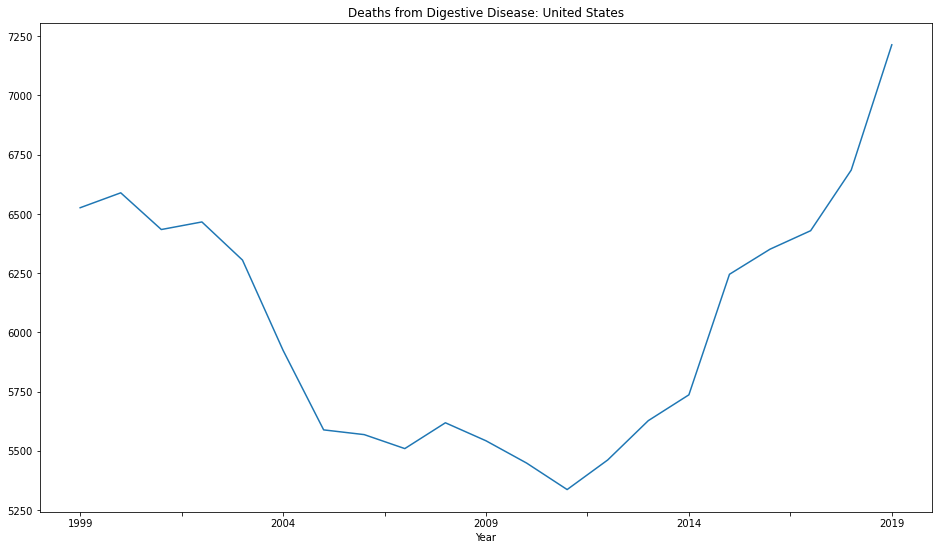

In [22]:
# Load matplotlib for plotting and instruct jupyter to display figures inline
from matplotlib import pyplot as plt
%matplotlib inline

# Group total number of deaths by year
df.groupby(by=['Year']).sum()['Deaths'].plot(title='Deaths from Digestive Disease: United States');
fig = plt.gcf()
fig.set_size_inches(16, 9)

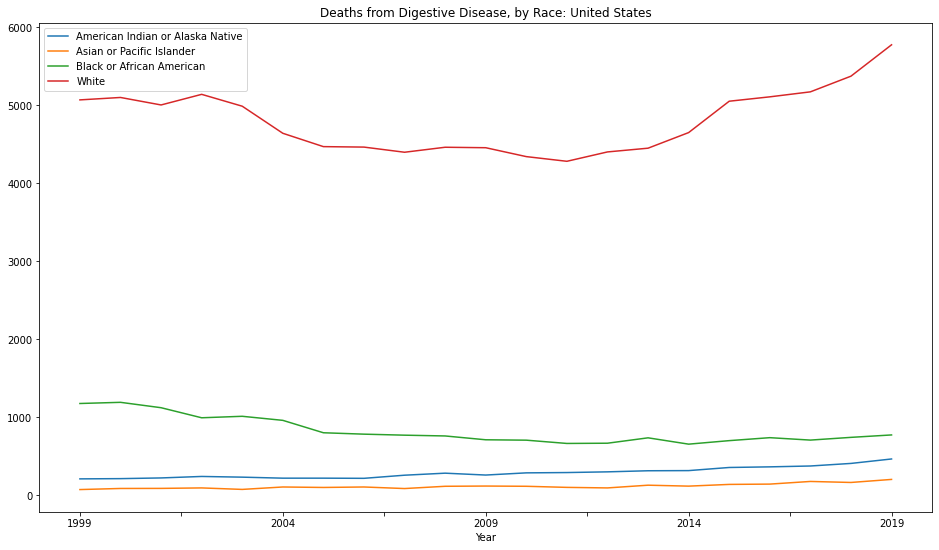

In [23]:
# Create mult-line chart for deaths by race 

# Store figure and axis for shared plot
fig, ax = plt.subplots()

# Store labels for all race groups
labels = []

# For each group in the groupby object, grab the 'Race' label and create a line plot for it
for key, grp in df.groupby(['Race']):
    ax = grp.plot(ax=ax, kind='line', x='Year', y='Deaths')
    labels.append(key)

# Set the labels for each line using the group labels
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Configure chart size and title
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.title("Deaths from Digestive Disease, by Race: United States");

In [24]:
# New query, this time we wish to group by year, month, and cause of death

b_parameters = {
    "B_1": "D76.V1-level1", # Year
    "B_2": "D76.V1-level2", # Month 
    "B_3": "D76.V2-level3 ",# Cause of death 
    "B_4": "*None*", 
    "B_5": "*None*"
}

f_parameters = {
    "F_D76.V1": ["*All*"], # year/month
    "F_D76.V10": ["*All*"], # Census Regions - dont change
    "F_D76.V2": ["X40","X41","X42","X43","X44","X60","X61","X62","X63","X64","X85","Y10","Y11","Y12","Y13","Y14"], 
        # ICD-10 Codes - Drug overdose deaths are identified using ICD–10 underlying cause-of-death codes: 
        # X40–X44, X60–X64, X85, and Y10–Y14.
    "F_D76.V27": ["*All*"], # HHS Regions - dont change
    "F_D76.V9": ["*All*"] # State County - dont change
}

v_parameters["V_D76.V5"] = "*All*"

In [25]:
xml_request = "<request-parameters>\n"
xml_request += createParameterList(b_parameters)
xml_request += createParameterList(m_parameters)
xml_request += createParameterList(f_parameters)
xml_request += createParameterList(i_parameters)
xml_request += createParameterList(o_parameters)
xml_request += createParameterList(vm_parameters)
xml_request += createParameterList(v_parameters)
xml_request += createParameterList(misc_parameters)
xml_request += "</request-parameters>"

In [26]:
url = "https://wonder.cdc.gov/controller/datarequest/D76"
response = requests.post(url, data={"request_xml": xml_request, "accept_datause_restrictions": "true"})

if response.status_code == 200:
    data = response.text
else:
    print("something went wrong")

In [27]:
data_frame = xml2df(data)

df = pd.DataFrame(data=data_frame, columns=["Year", "Month", "Cause of Death", "Deaths", "Population", "Crude Rate", "Age-adjusted Rate", "Age-adjusted Rate Standard Error"])

df.head()

,Year,Month,Cause of Death,Deaths,Population,Crude Rate,Age-adjusted Rate,Age-adjusted Rate Standard Error
0,1999,"Jan., 1999",Accidental poisoning by and exposure to nonopi...,19.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1,1999,"Jan., 1999",Accidental poisoning by and exposure to antiep...,47.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2,1999,"Jan., 1999",Accidental poisoning by and exposure to narcot...,460.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
3,1999,"Jan., 1999",Accidental poisoning by and exposure to other ...,4.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
4,1999,"Jan., 1999",Accidental poisoning by and exposure to other ...,370.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable


In [28]:
df.groupby(by='Year').sum().head()

,Deaths
Year,
1999,16849.0
2000,17415.0
2001,19394.0
2002,23518.0
2003,25785.0


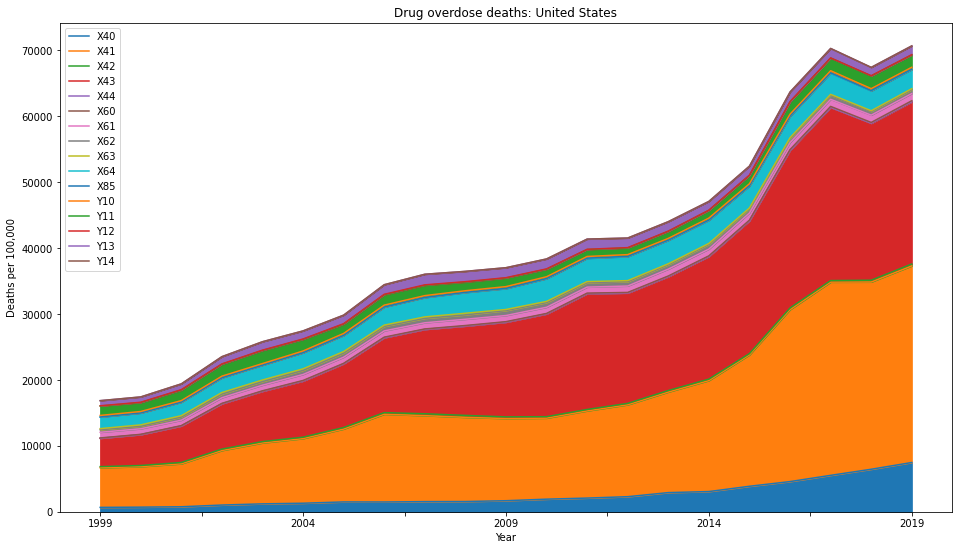

In [29]:
df_groups = df.groupby(by=['Year','Cause of Death'],as_index=False).sum()
df_pivot = df_groups.pivot(index='Year',columns='Cause of Death',values='Deaths')

ax = df_pivot.plot.area(title='Drug overdose deaths: United States')
legend_labels = ["X40","X41","X42","X43","X44","X60","X61","X62","X63","X64","X85","Y10","Y11","Y12","Y13","Y14"]
ax.legend(legend_labels);
ax.set_ylabel("Deaths per 100,000")
fig = plt.gcf()
fig.set_size_inches(16,9)